<a href="https://colab.research.google.com/github/vikaschaudhary53/Book-Recommendation-System/blob/main/Book_Recommendation_System_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Book Recommendation System
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

##Content
The Book-Crossing dataset comprises 3 files.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [585]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime

import warnings
from pylab import rcParams
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [586]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [587]:
books_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Books.csv')
ratings_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Ratings.csv')
users_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Module/Machine Learning/Capstone Project - Unsupervised Machine Learning - Vikas Chaudhary/data_book_recommendation/Users.csv')

In [588]:
books_df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [589]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [590]:
books_df.shape

(271360, 8)

####Get the required columns in 'book_df'

In [591]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [592]:
#select the columns that we need
books_df = books_df[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [593]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [594]:
#Rename columns
books_df.rename(columns={'Book-Title':'title', 'Book-Author':'author','Year-Of-Publication':'year','Publisher':'publisher'}, inplace=True)

In [595]:
books_df.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [596]:
books_df.isna().sum()

ISBN         0
title        0
author       1
year         0
publisher    2
dtype: int64

In [597]:
#drop the null values from dataframe
books_df.dropna(inplace = True)

In [598]:
books_df.isna().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

In [599]:
books_df.isnull().sum()

ISBN         0
title        0
author       0
year         0
publisher    0
dtype: int64

###Know about the users

In [600]:
users_df

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [601]:
users_df.shape

(278858, 3)

In [602]:
#renaming all the columns to small case
users_df.rename(columns={'User-ID':'user_id','Location':'location','Age':'age'}, inplace=True)

In [603]:
users_df.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [604]:
users_df

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


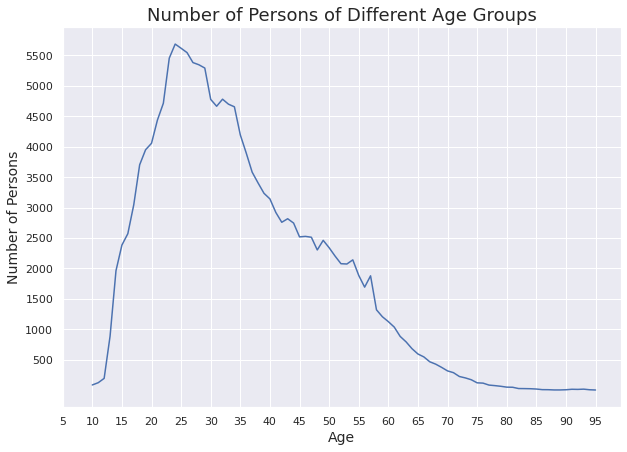

In [605]:
#graph to show the number of ratings done by the different age group
plt.subplots(figsize =(10, 7))
users_df[(~users_df['age'].isnull()) & (users_df['age']>=10) & (users_df['age']<=95)]['age'].value_counts().sort_index().plot()
plt.xlabel('Age', size=14)
plt.ylabel('Number of Persons', size=14)
plt.title('Number of Persons of Different Age Groups', size=18)
plt.xticks(np.arange(5,100,5))
plt.yticks(np.arange(500,6000,500))
plt.show()

In [606]:
#Find out that at least 80% of the individuals belongs to which age group, with the eligible age is from 10-95 years
total_num_nonNull = sum(users_df[(~users_df['age'].isnull()) & (users_df['age']>=10) & (users_df['age']<=95)]['age'].value_counts().values)
print('It has', total_num_nonNull, 'values as per the mentioned criteria.')

It has 166642 values as per the mentioned criteria.


In [607]:
#80% of the given number
print('There should be at least',round(total_num_nonNull*0.8), 'ratings.')

There should be at least 133314 ratings.


In [608]:
print(sum(users_df[(~users_df['age'].isnull()) & (users_df['age']>=16) & (users_df['age']<=49)]['age'].value_counts().values))
print('More than 80% of the users are 16-49 years of age.')

133395
More than 80% of the users are 16-49 years of age.


In the 'age' column the values are going beyond the permissible limits. Users with the age beyond 10 years and below 95 will be kept.

###Know the origin of ratings

In [609]:
location_list = list(users_df['location'].value_counts().keys())

In [610]:
long_list = []
count = 0
for i in location_list:
  if len(i.split(",")) >3:
    count+=1
    long_list.append(i)
#print(count)


Let's find out the country of users and plot a graph for the number of users per country

In [611]:
country_list = [i.split(', ')[-1] for i in location_list]

In [612]:
loction = [i.split(', ') for i in location_list]
# print(testing)
country = []
province = []
city = []
for i in range(len(loction)):
  if len(loction[i])==3:
    country.append(loction[i][-1])
    province.append(loction[i][-2])
    city.append(loction[i][-3])


In [613]:
location_dict = {'country': country, 'province_state': province, 'city': city}

In [614]:
location_df = pd.DataFrame(location_dict)
location_df

,country,province_state,city
0,united kingdom,england,london
1,canada,ontario,toronto
2,australia,new south wales,sydney
3,australia,victoria,melbourne
4,usa,oregon,portland
...,...,...,...
53634,germany,nordrhein-westfalen,gneisenaustr. 3
53635,germany,bayern,-
53636,algeria,guelma,bouchegouf
53637,usa,pennsylvania,indiana and philadelphia


In [615]:
#Top-10 Origins (countries) of ratings
location_df['country'].value_counts()[0:10]

usa               18341
germany            3960
united kingdom     3850
spain              3014
italy              2620
canada             2442
australia          2419
france             1426
netherlands        1000
portugal            952
Name: country, dtype: int64

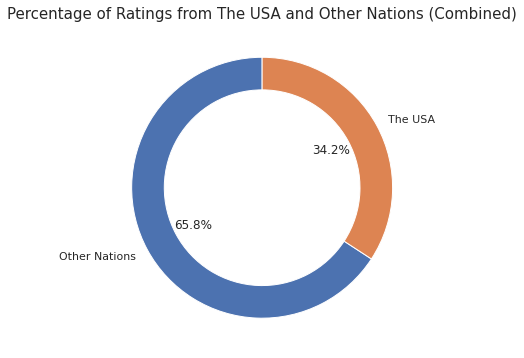

In [616]:
#find out what is the over all share of The USA
labels=['Other Nations', 'The USA']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie([len(location_df[location_df['country']!='usa']), len(location_df[location_df['country']=='usa'])], labels=labels, autopct='%1.1f%%',
       wedgeprops={'width':0.25}, startangle=90)
ax.set_title('Percentage of Ratings from The USA and Other Nations (Combined)', fontsize=15)
plt.show()

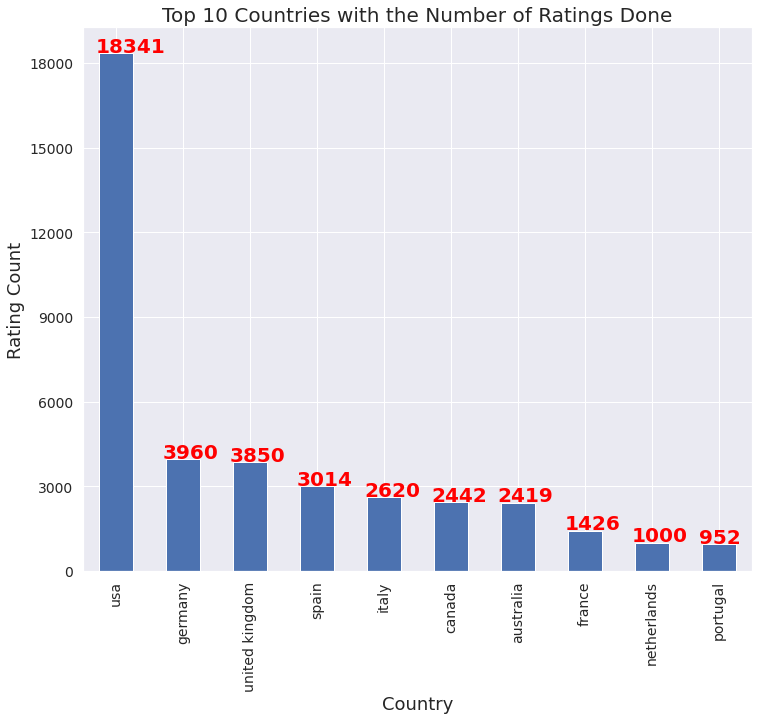

In [617]:
#bar graph for top 10 countries with highest ratings
plt.figure(figsize=[12,10])
location_df['country'].value_counts()[0:10].plot(kind='bar')

plt.title("Top 10 Countries with the Number of Ratings Done", fontsize=20)
plt.xlabel('Country', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=18)
plt.yticks(np.arange(0,19000,3000), fontsize=14)

for index, value in enumerate(list(location_df['country'].value_counts()[0:10].values)):
  plt.text(index-0.3, value+40, str(value), color = 'red', fontweight = 'bold', fontsize = 20)
plt.show()


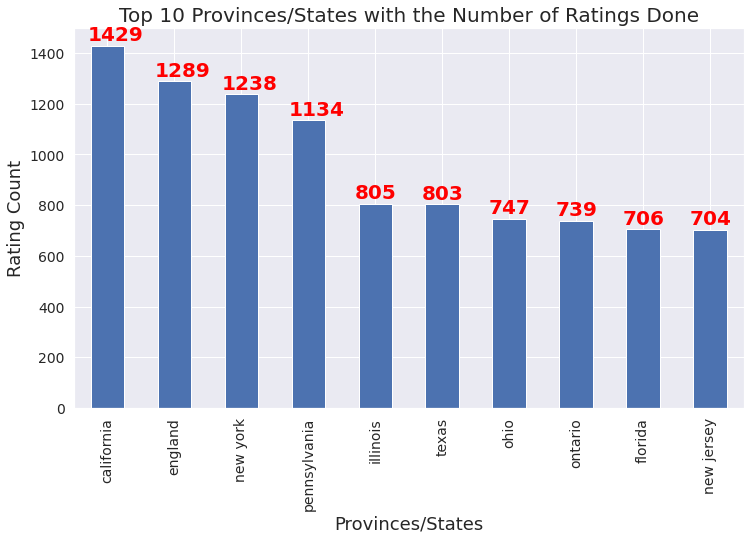

In [618]:
#bar graph for top 10 provinces/states with highest ratings
plt.figure(figsize=[12,7])
location_df['province_state'].value_counts()[1:11].plot(kind='bar')

plt.title("Top 10 Provinces/States with the Number of Ratings Done", fontsize=20)
plt.xlabel('Provinces/States', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=18)
plt.yticks(np.arange(0,1600,200), fontsize=14)

for index, value in enumerate(list(location_df['province_state'].value_counts()[1:11].values)):
  plt.text(index-0.3, value+20, str(value), color = 'red', fontweight = 'bold', fontsize = 20)
plt.show()


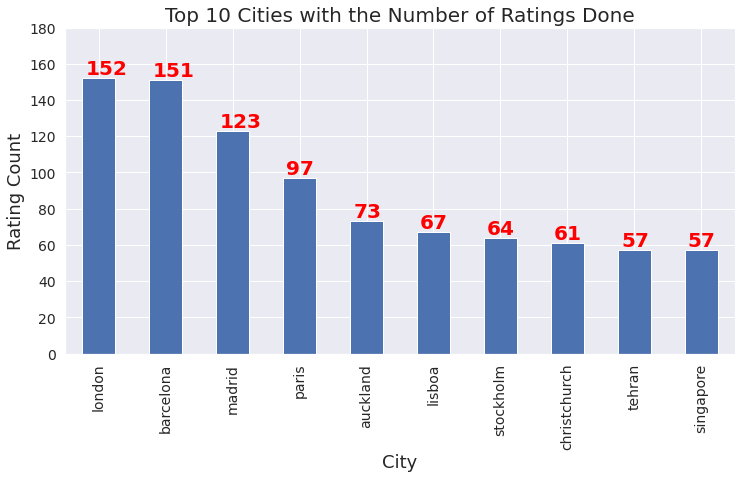

In [619]:
#bar graph for top 10 cities with highest ratings
plt.figure(figsize=[12,6])
location_df['city'].value_counts()[1:11].plot(kind='bar')

plt.title("Top 10 Cities with the Number of Ratings Done", fontsize=20)
plt.xlabel('City', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Rating Count', fontsize=18)
plt.yticks(np.arange(0,200,20), fontsize=14)

for index, value in enumerate(list(location_df['city'].value_counts()[1:11].values)):
  plt.text(index-0.2, value+2, str(value), color = 'red', fontweight = 'bold', fontsize = 20)
plt.show()


##Exploring Ratings Dataframe

In [620]:
ratings_df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [621]:
ratings_df.shape

(1149780, 3)

In [622]:
#Rename the columns
ratings_df.rename(columns={'User-ID':'user_id','Book-Rating':'rating'}, inplace=True)

In [623]:
ratings_df.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [624]:
ratings_df['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [625]:
#top 10 users who rated the books
ratings_df['user_id'].value_counts()[:10]

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: user_id, dtype: int64

In [626]:
#top 10 highest rated books
ratings_df['ISBN'].value_counts()[:10]

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: ISBN, dtype: int64

In [627]:
#keeping users with at least rating more than 200
ratings_df['user_id'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
116180    False
116166    False
116154    False
116137    False
276723    False
Name: user_id, Length: 105283, dtype: bool

In [628]:
x=ratings_df['user_id'].value_counts()>200

In [629]:
x[x].shape

(899,)

In [630]:
y=x[x].index

In [631]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [632]:
#final rating dataframe
ratings_df=ratings_df[ratings_df['user_id'].isin(y)]

In [633]:
ratings_df

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


###Joining 'ratings_df' with 'books_df'

In [634]:
#joining on 'ISBN'
books_rating = ratings_df.merge(books_df, on='ISBN')

In [635]:
books_rating

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA)
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim"
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann


In [636]:
number_rating=books_rating.groupby('title')['rating'].count().reset_index()

In [637]:
number_rating

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [638]:
number_rating.rename(columns={'rating':'number_of_ratings'}, inplace=True)

In [639]:
number_rating

,title,number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160263,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160264,Ã?Â?lpiraten.,1
160265,Ã?Â?rger mit Produkt X. Roman.,1
160266,Ã?Â?stlich der Berge.,1


In [640]:
#joining the rating with title
final_rating = books_rating.merge(number_rating, on='title')

In [641]:
#final dataframe that we need
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
487664,275970,1892145022,0,Here Is New York,E. B. White,1999,Little Bookroom,1
487665,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),1
487666,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",1
487667,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,1


Let's try to understand the final dataset before performing any task.

In [642]:
final_rating['number_of_ratings'].value_counts()[:19]

1     93584
2     54266
3     37428
4     27388
5     21700
6     17970
7     14910
8     12400
9     10539
10     9890
11     8118
12     7740
13     7124
14     6006
15     5745
16     5744
17     4947
18     4644
19     4598
Name: number_of_ratings, dtype: int64

number of books that have received the number of ratings below 20 times, we can delete them.

In [643]:
#keeping the books more than 50 rating received
final_rating = final_rating[final_rating['number_of_ratings']>20]

In [644]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
344226,229011,0671737635,10,Something Wonderful,Judith McNaught,1991,Pocket,21
344227,245963,0671737635,0,Something Wonderful,Judith McNaught,1991,Pocket,21
344228,258185,0671737635,7,Something Wonderful,Judith McNaught,1991,Pocket,21
344229,264031,0671737635,7,Something Wonderful,Judith McNaught,1991,Pocket,21


Let's look into 'title' and 'author' columns if there is any accuracy issue.

In [645]:
#books
final_rating['title'].value_counts()

Wild Animus                              363
Bridget Jones's Diary                    277
The Lovely Bones: A Novel                270
The Notebook                             241
The Pelican Brief                        236
                                        ... 
No Place Like Home (Holiday Classics)     21
Women in Love                             21
Under the Lake                            21
The Far Side Observer                     21
Something Wonderful                       21
Name: title, Length: 2955, dtype: int64

In [646]:
final_rating[final_rating['title']=='Wild Animus']['author'].value_counts()

Rich Shapero    363
Name: author, dtype: int64

In [647]:
#authors
final_rating['author'].value_counts()

Nora Roberts       3653
Stephen King       3444
James Patterson    2100
Danielle Steel     1908
John Grisham       1852
                   ... 
Ian Montgomery        1
Hal Lindsey           1
Joe Coomer            1
CHAIM POTOK           1
Alan Rodgers          1
Name: author, Length: 1888, dtype: int64

In [648]:
final_rating[final_rating['author']=='Nora Roberts']['title'].value_counts()

Dance upon the Air (Three Sisters Island Trilogy)    100
Face the Fire (Three Sisters Island Trilogy)          99
The Villa                                             97
Heaven and Earth (Three Sisters Island Trilogy)       95
Carolina Moon                                         88
                                                    ... 
Once upon a Dream                                     17
Temptation                                            16
Remember When                                         10
Sweet Revenge                                          5
Second Nature                                          1
Name: title, Length: 82, dtype: int64

In [649]:
final_rating.isna().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [650]:
final_rating.isnull().sum()

user_id              0
ISBN                 0
rating               0
title                0
author               0
year                 0
publisher            0
number_of_ratings    0
dtype: int64

In [651]:
final_rating.describe()

,user_id,rating,number_of_ratings
count,128828.000000,128828.000000,128828.000000
mean,140854.141460,1.901970,65.207533
std,80658.729114,3.484735,50.059962
min,254.000000,0.000000,21.000000
25%,71712.000000,0.000000,30.000000
50%,141710.000000,0.000000,48.000000
75%,212923.000000,0.000000,81.000000
max,278418.000000,10.000000,363.000000


'year' is not present in the desribe table, because its datatype could be different.

In [652]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128828 entries, 0 to 344230
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            128828 non-null  int64 
 1   ISBN               128828 non-null  object
 2   rating             128828 non-null  int64 
 3   title              128828 non-null  object
 4   author             128828 non-null  object
 5   year               128828 non-null  object
 6   publisher          128828 non-null  object
 7   number_of_ratings  128828 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 8.8+ MB


In [653]:
#converting 'year' into 'int' type
final_rating['year'] = final_rating['year'].astype(int)

In [654]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128828 entries, 0 to 344230
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   user_id            128828 non-null  int64 
 1   ISBN               128828 non-null  object
 2   rating             128828 non-null  int64 
 3   title              128828 non-null  object
 4   author             128828 non-null  object
 5   year               128828 non-null  int64 
 6   publisher          128828 non-null  object
 7   number_of_ratings  128828 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 8.8+ MB


In [655]:
final_rating['year'].value_counts().sort_index()

0         654
1920       13
1923        7
1930       23
1938        2
        ...  
2002    13927
2003     9764
2004     3022
2010        1
2011        5
Name: year, Length: 65, dtype: int64

In [656]:
booksWithNoYear = list(final_rating[final_rating['year'] == 0]['title'].value_counts().keys())

In [657]:
final_rating[final_rating['year'] == 0]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
745,88733,1569874115,10,The Secret Garden,Frances Hodgson Burnett,0,Landoll,79
746,96448,1569873925,10,The Secret Garden,Frances Hodgson Burnett,0,Landoll,79
4672,164533,B00008WFXL,0,The Da Vinci Code,Dan Brown,0,Doubleday,224
5964,31315,0399144048,10,Firebird,Janice Graham,0,Putnam Publishing Group,40
5965,136205,0399144048,0,Firebird,Janice Graham,0,Putnam Publishing Group,40
...,...,...,...,...,...,...,...,...
271345,198711,0445043016,0,Death of an Expert Witness,P D James,0,Warner Books> C/o Little Br,22
271346,235105,0445043016,0,Death of an Expert Witness,P D James,0,Warner Books> C/o Little Br,22
271347,246655,0445043016,0,Death of an Expert Witness,P D James,0,Warner Books> C/o Little Br,22
271348,267635,0445043016,0,Death of an Expert Witness,P D James,0,Warner Books> C/o Little Br,22


Some of the above books have high number of ratings so, they appears to be famous. We need to find out if their years are present.

In [658]:
final_rating[final_rating['title']=='The Da Vinci Code']

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
4452,277427,0385504209,8,The Da Vinci Code,Dan Brown,2003,Doubleday,224
4453,3363,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,224
4454,6543,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,224
4455,6575,0385504209,0,The Da Vinci Code,Dan Brown,2003,Doubleday,224
4456,7915,0385504209,10,The Da Vinci Code,Dan Brown,2003,Doubleday,224
...,...,...,...,...,...,...,...,...
4671,150979,0739302043,9,The Da Vinci Code,DAN BROWN,2003,Random House Audio,224
4672,164533,B00008WFXL,0,The Da Vinci Code,Dan Brown,0,Doubleday,224
4673,182987,0385504217,0,The Da Vinci Code,Dan Brown,2003,Doubleday Books,224
4674,193499,0739307312,9,The Da Vinci Code,DAN BROWN,2003,Random House Audio,224


We need to correct 2 things. 1. number of ratings and 2. Years with entry '0'. 

In [659]:
#basic overview
print('Before any feature engineering or any operation, the final dataset has:')
print(len(final_rating.groupby(['title']).count()), 'books')
print(len(final_rating.groupby(['author']).count()), 'authors')
print(len(final_rating.groupby(['publisher']).count()), 'publishers')


Before any feature engineering or any operation, the final dataset has:
2955 books
1888 authors
719 publishers


In [660]:
#converting all the authors name into the lowercase
final_rating['author'] = final_rating['author'].str.lower()

In [661]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82


In [662]:
final_rating['title'].value_counts()[:10]

Wild Animus                                        363
Bridget Jones's Diary                              277
The Lovely Bones: A Novel                          270
The Notebook                                       241
The Pelican Brief                                  236
The Nanny Diaries: A Novel                         230
Divine Secrets of the Ya-Ya Sisterhood: A Novel    228
A Painted House                                    228
The Firm                                           227
The Da Vinci Code                                  224
Name: title, dtype: int64

In [663]:
#need to findout if one book has multiple authors
for i in final_rating['title'].value_counts().keys():
  if len(final_rating[final_rating['title']==i]['author'].value_counts().keys()) >1:
    print(i)

Snow Falling on Cedars
The Testament
When the Wind Blows
Jurassic Park
Dreamcatcher
Violets Are Blue
The Beach House
The Reader
While I Was Gone
Lightning
The Last Precinct
Whispers
The Gift
Lord of the Flies
Fahrenheit 451
Back Roads
Watership Down
Outlander
Cradle and All
The Fellowship of the Ring (The Lord of the Rings, Part 1)
Insomnia
Flesh and Blood
One True Thing
The Rescue
The Lost World
The Catcher in the Rye
Isle of Dogs
Southern Cross
Faking It
Icy Sparks
Ashes to Ashes
From Potter's Field
Scarlet Feather
Unnatural Exposure
The Wedding
Hideaway
Heartbreaker
Riptide
Remember Me
False Memory
Red Storm Rising
Mercy
Still Waters
Blessings
The Switch
Wanderlust
The Two Towers (The Lord of the Rings, Part 2)
Thinner
The Return of the King (The Lord of the Rings, Part 3)
The Secret Garden
Sanctuary
Postmortem
Beloved
Dust to Dust
I'll Be Seeing You
A Wrinkle in Time
The Kiss
Night
The Surgeon
Daddy
Easy Prey
Paradise
Dark Paradise
The Guardian
The Loop
Mirror Image
From the Corner

In [664]:
final_rating[final_rating['title']=='Fahrenheit 451']['author'].value_counts()

ray bradbury    118
bradbury          1
Name: author, dtype: int64

It's confirmed that one book has multiple author entries, that could be of same author or different one.

Get a list of books where the authors entries are different or more than one.

In [665]:
list(final_rating['title'].value_counts().keys())[10]

'The Horse Whisperer'

In [666]:
#creating a list of books with 2 authors entries
two_authors_book = []
many_authors_books = []
count = 0
for i in list(final_rating['title'].value_counts().keys()):
  if len(final_rating[final_rating['title']== i]['author'].value_counts().values)==2:
    two_authors_book.append(list(final_rating['title'].value_counts().keys())[count])
  
  elif len(final_rating[final_rating['title']== i]['author'].value_counts().values) >2:
    many_authors_books.append(list(final_rating['title'].value_counts().keys())[count])
  count +=1


In [667]:
print("There are", len(two_authors_book),"books where the number of entries in 'author' column are 2")
print("There are", len(many_authors_books),"books where the number of entries in 'author' column are more than 2")

There are 320 books where the number of entries in 'author' column are 2
There are 238 books where the number of entries in 'author' column are more than 2


In [668]:
author1 = []
author2 = []
for i in two_authors_book:
  author1.append(final_rating[final_rating['title']==i]['author'].value_counts().keys()[0])
  author2.append(final_rating[final_rating['title']==i]['author'].value_counts().keys()[1])


In [669]:
author1[:5]

['john grisham',
 'james patterson',
 'james patterson',
 'bernhard schlink',
 'sue miller']

In [670]:
author2[:5]

['elie wiesel',
 'ronda thompson',
 'georgia bockoven',
 'carol brown janeway',
 'miller sue']

In [671]:
#creating a dataframe for two authors entry books.
data = {'books': two_authors_book, 
        'author1': author1,
        'author2': author2}

two_author_book_df = pd.DataFrame(data)

In [672]:
two_author_book_df.head(10)

,books,author1,author2
0,The Testament,john grisham,elie wiesel
1,Violets Are Blue,james patterson,ronda thompson
2,The Beach House,james patterson,georgia bockoven
3,The Reader,bernhard schlink,carol brown janeway
4,While I Was Gone,sue miller,miller sue
5,The Last Precinct,patricia cornwell,patricia daniels cornwell
6,Lord of the Flies,william gerald golding,william golding
7,Fahrenheit 451,ray bradbury,bradbury
8,Back Roads,tawni o'dell,susan crandall
9,Watership Down,richard adams,richard george adams


In [673]:
two_author_book_df['author1'][0].split(" ")

['john', 'grisham']

In [674]:
def author(name1, name2):
  for i in name1.split(" "):
    if i in name2.split(" "):
      return name1


In [675]:
li = two_author_book_df.apply(lambda x: author(x['author1'], x['author2']), axis=1)
li

0                       None
1                       None
2                       None
3                       None
4                 sue miller
               ...          
315            wayne w. dyer
316                     None
317                     None
318    kathleen e. woodiwiss
319           d. h. lawrence
Length: 320, dtype: object

In [676]:
li.dropna()

4                  sue miller
5           patricia cornwell
6      william gerald golding
7                ray bradbury
9               richard adams
                ...          
309             david morrell
310          michael r. eades
315             wayne w. dyer
318     kathleen e. woodiwiss
319            d. h. lawrence
Length: 118, dtype: object

In [677]:
#creating a list of books with same authors but entered in different ways
same_author_books = []
for ind in range(len(two_author_book_df)):
  for i in range(len(two_author_book_df['author1'][ind].split())):
    a = two_author_book_df['author1'][ind].split()[i]
    for j in two_author_book_df['author2'][ind].split():
      if a in j:
        same_author_books.append(two_author_book_df['books'][ind])
     

In [678]:
two_author_book_df = two_author_book_df.loc[two_author_book_df['books'].isin(set(same_author_books))]
two_author_book_df

,books,author1,author2
4,While I Was Gone,sue miller,miller sue
5,The Last Precinct,patricia cornwell,patricia daniels cornwell
6,Lord of the Flies,william gerald golding,william golding
7,Fahrenheit 451,ray bradbury,bradbury
9,Watership Down,richard adams,richard george adams
...,...,...,...
309,Assumed Identity,david morrell,david r. morrell
310,Protein Power: The High-Protein/Low Carbohydra...,michael r. eades,"michael r., md eades"
315,Your Erroneous Zones,wayne w. dyer,"wayne w., dr. dyer"
318,Shanna,kathleen e. woodiwiss,kathleen e woodiwiss


In [679]:
#creating dictionary from the above dataframe to replace the anomaly in the authors name in the given books
two_author_book_dict = dict(zip(two_author_book_df.books, two_author_book_df.author1))
two_author_book_dict

{'While I Was Gone': 'sue miller',
 'The Last Precinct': 'patricia cornwell',
 'Lord of the Flies': 'william gerald golding',
 'Fahrenheit 451': 'ray bradbury',
 'Watership Down': 'richard adams',
 'The Fellowship of the Ring (The Lord of the Rings, Part 1)': 'j.r.r. tolkien',
 'Isle of Dogs': 'patricia cornwell',
 'Faking It': 'jennifer crusie',
 'Icy Sparks': 'gwyn hyman rubio',
 "From Potter's Field": 'patricia daniels cornwell',
 'False Memory': 'dean r. koontz',
 'The Two Towers (The Lord of the Rings, Part 2)': 'j.r.r. tolkien',
 'The Return of the King (The Lord of the Rings, Part 3)': 'j.r.r. tolkien',
 'A Wrinkle in Time': "madeleine l'engle",
 'From the Corner of His Eye': 'dean koontz',
 'Rebecca': 'daphne du maurier',
 'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values': 'robert pirsig',
 'Anne of Avonlea (Anne of Green Gables Novels (Paperback))': 'l.m. montgomery',
 'Midnight in the Garden of Good and Evil': 'john berendt',
 'Dark Rivers of the Heart': 'de

In [680]:
list(two_author_book_dict.keys())[0]

'While I Was Gone'

In [681]:
final_rating[final_rating['title']=='Fahrenheit 451']['author'].value_counts()

ray bradbury    118
bradbury          1
Name: author, dtype: int64

In [682]:
for i in two_author_book_dict.keys():
  final_rating['author'].mask(final_rating['title']==i, two_author_book_dict.get(i), inplace = True)
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
344226,229011,0671737635,10,Something Wonderful,judith mcnaught,1991,Pocket,21
344227,245963,0671737635,0,Something Wonderful,judith mcnaught,1991,Pocket,21
344228,258185,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,21
344229,264031,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,21


In [683]:
#validate if it worked
final_rating[final_rating['title']=='Fahrenheit 451']['author'].value_counts()

ray bradbury    119
Name: author, dtype: int64

Look into the list of the books with more than one author.

In [684]:
final_rating.loc[final_rating['title'].isin(set(many_authors_books))][['title', 'author']].drop_duplicates().head(10)

,title,author
679,The Secret Garden,frances hodgson burnett
713,The Secret Garden,m.j. carr
723,The Secret Garden,frances h. burnett
2979,Silent Witness,richard north patterson
3041,Silent Witness,margaret yorke
3042,Silent Witness,carol ellis
3683,Postmortem,patricia daniels cornwell
3752,Postmortem,patricia cornwell
3760,Postmortem,patricia d. cornwell
3897,Smoke and Mirrors,barbara michaels


In [685]:
many_author_book_df = final_rating.loc[final_rating['title'].isin(set(many_authors_books))][['title', 'author']].drop_duplicates()
many_author_book_df

,title,author
679,The Secret Garden,frances hodgson burnett
713,The Secret Garden,m.j. carr
723,The Secret Garden,frances h. burnett
2979,Silent Witness,richard north patterson
3041,Silent Witness,margaret yorke
...,...,...
314445,Once upon a Dream,jennifer archer
330528,Thief of Hearts,katherine stone
330536,Thief of Hearts,teresa medeiros
330547,Thief of Hearts,kate silver


In [686]:
many_author_book_df.head(20)

,title,author
679,The Secret Garden,frances hodgson burnett
713,The Secret Garden,m.j. carr
723,The Secret Garden,frances h. burnett
2979,Silent Witness,richard north patterson
3041,Silent Witness,margaret yorke
3042,Silent Witness,carol ellis
3683,Postmortem,patricia daniels cornwell
3752,Postmortem,patricia cornwell
3760,Postmortem,patricia d. cornwell
3897,Smoke and Mirrors,barbara michaels


By deleting the middle name the inaccuracy in the authors name can be reduced without convoluting the dataframe.

In [687]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james finn garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
344226,229011,0671737635,10,Something Wonderful,judith mcnaught,1991,Pocket,21
344227,245963,0671737635,0,Something Wonderful,judith mcnaught,1991,Pocket,21
344228,258185,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,21
344229,264031,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,21


In [688]:
final_rating[final_rating['title']=='The Secret Garden']['author'].value_counts()

frances hodgson burnett    58
frances h. burnett         17
m.j. carr                   4
Name: author, dtype: int64

In [689]:
def columns(author):
  a = author.split()
  return str(a[0]+" "+a[-1])

In [690]:
final_rating['author'] = final_rating.apply(lambda x: columns(x['author']), axis = 1)

In [691]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82
...,...,...,...,...,...,...,...,...
344226,229011,0671737635,10,Something Wonderful,judith mcnaught,1991,Pocket,21
344227,245963,0671737635,0,Something Wonderful,judith mcnaught,1991,Pocket,21
344228,258185,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,21
344229,264031,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,21


In [692]:
#validating if the above method works
final_rating[final_rating['title']=='The Secret Garden']['author'].value_counts()

frances burnett    75
m.j. carr           4
Name: author, dtype: int64

Earliers, there were: 'frances hodgson burnett' have 58 entries and frances burnett have 17, and now frances burnett have 75 entries.

The above dataframe shows that some books with same names have different authors while some have same authors with different entries

It appears that the book with different author names are different books, so we will keep those entries for books as they are.

####Dealing with 0 in year and count the number of ratings before plotting any graphs.

In [693]:
#creating a new column with 'title+author' for uniqueness 
final_rating['titleAuthorPublisher'] = final_rating['title'] + final_rating['author'] + final_rating['publisher']
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings,titleAuthorPublisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...


In [694]:
list(final_rating[final_rating['year']==0]['titleAuthorPublisher'].value_counts().keys())[0]

'Call of the Wildjack londonSelldowns/no More Orders'

In [695]:
to_keep = []
to_drop = []
for i in list(final_rating[final_rating['year']==0]['titleAuthorPublisher'].value_counts().keys()):
  if len(final_rating[final_rating['titleAuthorPublisher']==i]['year'].value_counts()) == 1:
    to_drop.append(i)
  else:
    to_keep.append(i)

In [696]:
print("Out of",len(list(final_rating[final_rating['year']==0]['titleAuthorPublisher'].value_counts().keys())),"only",len(to_keep),"have values for 0 in 'year' column while", 
      len(to_drop), "have no year values")

Out of 118 only 8 have values for 0 in 'year' column while 110 have no year values


In [697]:
#drop entries with values of 'year' is 0
final_rating = final_rating[final_rating['year']!=0]

In [698]:
#check if there is still 0 in 'year'
final_rating[final_rating['year']==0]

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings,titleAuthorPublisher


In [699]:
final_rating['titleAuthorPublisher'].value_counts()

Wild Animusrich shaperoToo Far                                           363
The Lovely Bones: A Novelalice seboldLittle, Brown                       270
The Notebooknicholas sparksWarner Books                                  239
Divine Secrets of the Ya-Ya Sisterhood: A Novelrebecca wellsPerennial    220
The Pelican Briefjohn grishamDell                                        218
                                                                        ... 
Needful Thingsstephen kingSmithmark Pub                                    1
Mr. Perfectlinda howardSimon &amp; Schuster Audio                          1
Gerald's Gamestephen kingSmithmark Pub                                     1
Gerald's Gamestephen kingHighbridge Audio                                  1
Heatarthur herzogTudor Publishers                                          1
Name: titleAuthorPublisher, Length: 6489, dtype: int64

In [700]:
final_rating['ISBN'].value_counts()

0971880107    363
0316666343    270
0060928336    220
0440214041    218
0385504209    215
             ... 
0520237714      1
1568656017      1
0451518845      1
0451515560      1
0330240242      1
Name: ISBN, Length: 7181, dtype: int64

In [701]:
final_rating[final_rating['titleAuthorPublisher']=='The Notebooknicholas sparksWarner Books']['titleAuthorPublisher'].value_counts()

The Notebooknicholas sparksWarner Books    239
Name: titleAuthorPublisher, dtype: int64

In [702]:
final_rating[final_rating['titleAuthorPublisher']=='The Notebooknicholas sparksWarner Books']['year'].value_counts()

1998    166
1996     40
1999     33
Name: year, dtype: int64

In [703]:
final_rating[final_rating['titleAuthorPublisher']=='The Notebooknicholas sparksWarner Books']['ISBN'].value_counts()

0446605239    166
0446520802     40
0446676098     33
Name: ISBN, dtype: int64

In [704]:
#let's create another column to validate further
final_rating['book_author'] = final_rating['title'] + final_rating['author']

In [705]:
final_rating['book_author'].value_counts()

Wild Animusrich shapero                  363
Bridget Jones's Diaryhelen fielding      277
The Lovely Bones: A Novelalice sebold    270
The Notebooknicholas sparks              241
The Pelican Briefjohn grisham            236
                                        ... 
Full Circlepat browning                    1
Little Womenlaurie lawlor                  1
Bittersweetjanis flores                    1
Bittersweetsusan strasberg                 1
Dazzleelinor klein                         1
Name: book_author, Length: 3821, dtype: int64

number of books count increased by this method eg for The Notebook

In [706]:
#dropping 'titleAuthorPublisher' column
final_rating.drop(columns = 'titleAuthorPublisher', axis=1, inplace=True)
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,number_of_ratings,book_author
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,82,Politically Correct Bedtime Stories: Modern Ta...


In [707]:
#dopping 'number_of_ratings' column
final_rating.drop(columns = 'number_of_ratings', axis=1, inplace=True)
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,book_author
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...


In [708]:
final_rating.groupby('book_author')['rating'].count().sort_values()

book_author
No Safe Placebarbara bretton               1
Dead Endguy smith                          1
Shadowskimberly rangel                     1
Dazzlejudith gould                         1
Dazzleelinor klein                         1
                                        ... 
The Pelican Briefjohn grisham            236
The Notebooknicholas sparks              241
The Lovely Bones: A Novelalice sebold    270
Bridget Jones's Diaryhelen fielding      277
Wild Animusrich shapero                  363
Name: rating, Length: 3821, dtype: int64

In [709]:
#book rating distribution
rating_dist = pd.DataFrame(final_rating.groupby('title')['rating'].mean())
rating_dist['rating_count'] = final_rating.groupby('title')['rating'].count()
rating_dist

,rating,rating_count
title,,
10 Lb. Penalty,1.742857,35
101 Dalmatians,2.666667,21
16 Lighthouse Road,1.131579,38
1984,3.360000,75
1st to Die: A Novel,2.407407,162
...,...,...
Zia,2.000000,23
Zlata's Diary: A Child's Life in Sarajevo,1.785714,14
Zoya,1.237288,59


<Figure size 864x432 with 0 Axes>

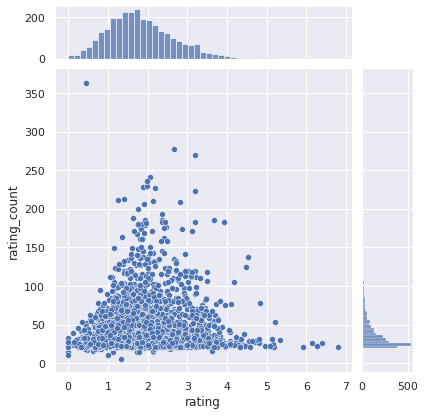

In [710]:
#jointplot to know the distribution of rating and rating count
plt.figure(figsize=[12,6])
sns.jointplot(x='rating', y='rating_count', data=rating_dist, height=6, marginal_ticks=True)

we will drop entries with rating count less than 30

In [711]:
to_delete = list(rating_dist[rating_dist['rating_count']<30].index)

In [712]:
final_rating

,user_id,ISBN,rating,title,author,year,publisher,book_author
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...,...,...,...,...
344226,229011,0671737635,10,Something Wonderful,judith mcnaught,1991,Pocket,Something Wonderfuljudith mcnaught
344227,245963,0671737635,0,Something Wonderful,judith mcnaught,1991,Pocket,Something Wonderfuljudith mcnaught
344228,258185,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,Something Wonderfuljudith mcnaught
344229,264031,0671737635,7,Something Wonderful,judith mcnaught,1991,Pocket,Something Wonderfuljudith mcnaught


In [713]:
final_rating = final_rating[~final_rating['title'].isin(to_delete)]
final_rating

,user_id,ISBN,rating,title,author,year,publisher,book_author
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc,Politically Correct Bedtime Stories: Modern Ta...
...,...,...,...,...,...,...,...,...
334649,63938,0393324826,0,Stiff: The Curious Lives of Human Cadavers,mary roach,2004,W. W. Norton &amp; Company,Stiff: The Curious Lives of Human Cadaversmary...
334650,78783,0393324826,10,Stiff: The Curious Lives of Human Cadavers,mary roach,2004,W. W. Norton &amp; Company,Stiff: The Curious Lives of Human Cadaversmary...
334651,126604,0393324826,0,Stiff: The Curious Lives of Human Cadavers,mary roach,2004,W. W. Norton &amp; Company,Stiff: The Curious Lives of Human Cadaversmary...
334652,156150,0393324826,0,Stiff: The Curious Lives of Human Cadavers,mary roach,2004,W. W. Norton &amp; Company,Stiff: The Curious Lives of Human Cadaversmary...


In [714]:
to_delete[0]

'101 Dalmatians'

In [715]:
final_rating[final_rating['title']=='101 Dalmatians']

,user_id,ISBN,rating,title,author,year,publisher,book_author


In [716]:
#dropping the 'book_author' column
final_rating.drop(columns = 'book_author', axis=1, inplace=True)
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc


There is a difference in the number of unique books on the basis of ISBN and the combination of book title, book author and the publisher. It is because the different editions of the same book were published in different year. So, the combination of title, book author and the publisher will be our unique key for operation.

In [717]:
#basic overview
print('After data cleaning, the final dataset has:')
print(len(final_rating.groupby(['title']).count()), 'books')
print(len(final_rating.groupby(['author']).count()), 'authors')
print(len(final_rating.groupby(['publisher']).count()), 'publishers')


After data cleaning, the final dataset has:
1722 books
1028 authors
528 publishers


###Plotting different graphs/charts for different pieces of information that are there in the dataset.

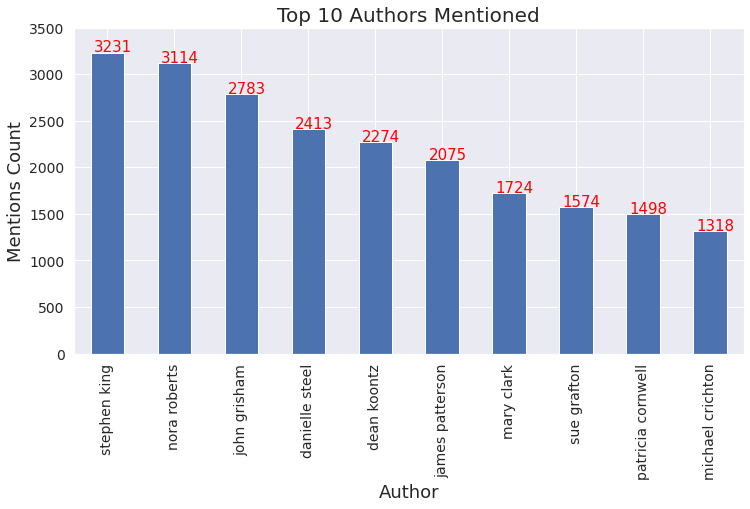

In [718]:
#bar graph for top 10 authors mentioned in the dataframe
top10_mention = final_rating['author'].value_counts()[:10]
plt.figure(figsize=[12,6])
top10_mention.plot(kind='bar')

plt.title("Top 10 Authors Mentioned", fontsize=20)
plt.xlabel('Author', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Mentions Count', fontsize=18)
plt.yticks(np.arange(0,4000,500), fontsize=14)

for index, value in enumerate(list(top10_mention.values)):
  plt.text(index-0.2, value+10, str(value), color = 'red', fontsize = 15)
plt.show()


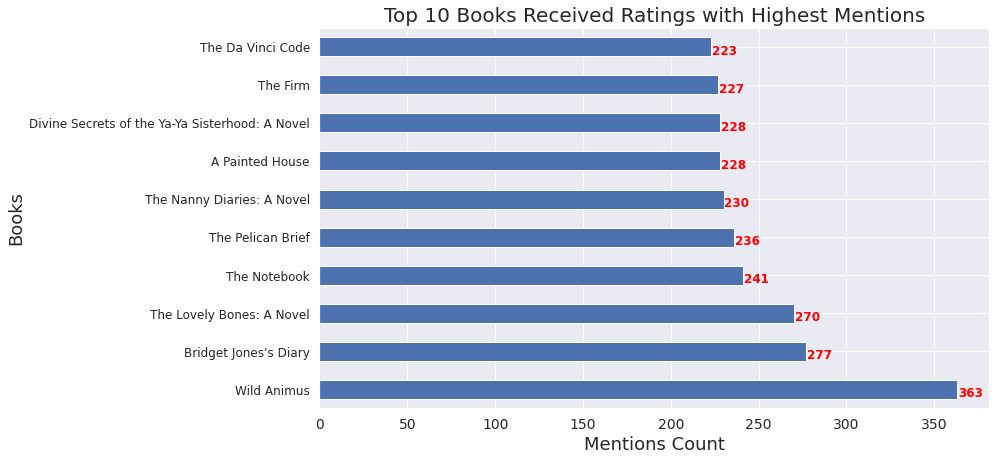

In [719]:
#top 10 books that received ratings with highest mentions
plt.figure(figsize=[12,7])
ax = final_rating['title'].value_counts()[:10].plot.barh()

plt.title("Top 10 Books Received Ratings with Highest Mentions", fontsize=20)
plt.xlabel('Mentions Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Books', fontsize=18)

for index, value in enumerate(list(final_rating['title'].value_counts()[:10].values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

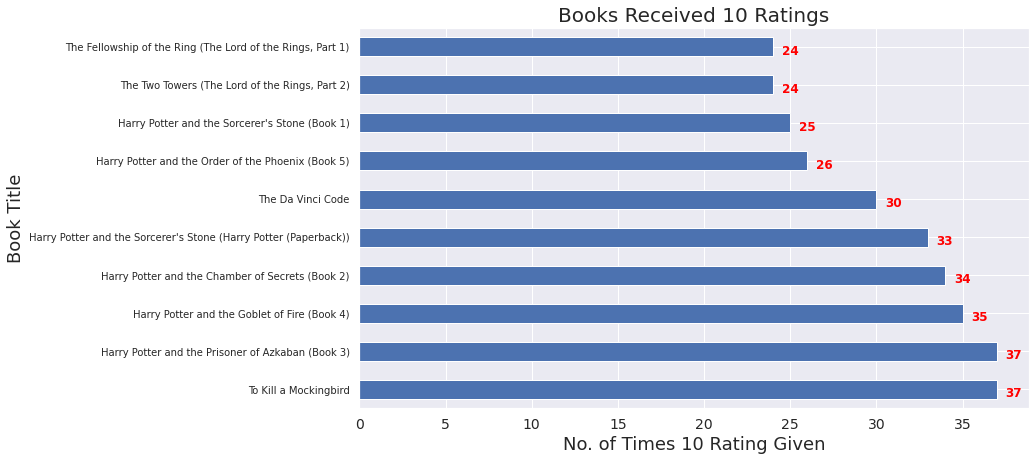

In [720]:
#top 10 books that received ratings with highest mentions
top_rated=final_rating[final_rating['rating']==10]['title'].value_counts()[:10]
plt.figure(figsize=[12,7])
ax = top_rated.plot.barh()
plt.title("Books Received 10 Ratings", fontsize=20)
plt.xlabel('No. of Times 10 Rating Given', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Book Title', fontsize=18)
plt.yticks(fontsize=10)

for index, value in enumerate(list(top_rated.values)):
    ax.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

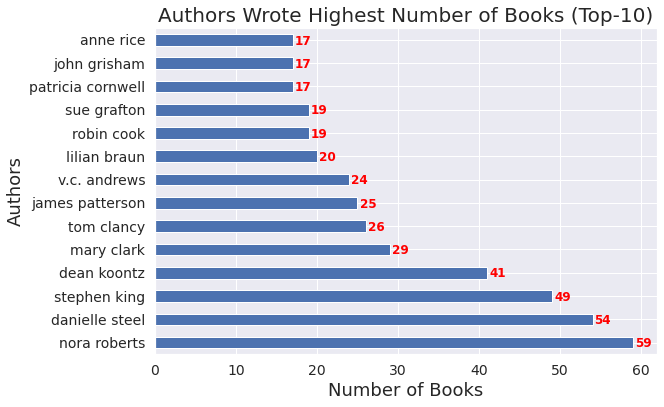

In [721]:
#list of 10 authors who wrote highest number of books
authors_with_more_than_10_books = final_rating[['title', 'author']].drop_duplicates()['author'].value_counts()[:14]
plt.figure(figsize=[9,6])
ax = authors_with_more_than_10_books.plot.barh(x='lab', y='val', rot=0)

plt.title("Authors Wrote Highest Number of Books (Top-10)", fontsize=20)
plt.xlabel('Number of Books', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Authors', fontsize=18)
plt.yticks(fontsize=14)

for index, value in enumerate(list(authors_with_more_than_10_books.values)):
    ax.text(value+0.25, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

In [722]:
print("The average rating of all the books is:", round(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False).mean(), 2), 'when 0 is also considered as rating.')

The average rating of all the books is: 1.86 when 0 is also considered as rating.


In [723]:
print("The average rating of all the books is:", round(final_rating[final_rating['rating']!=0].groupby(['title']).mean()['rating'].sort_values(ascending = False).mean(), 2), 'when 0 is not considered as rating.')

The average rating of all the books is: 7.8 when 0 is not considered as rating.


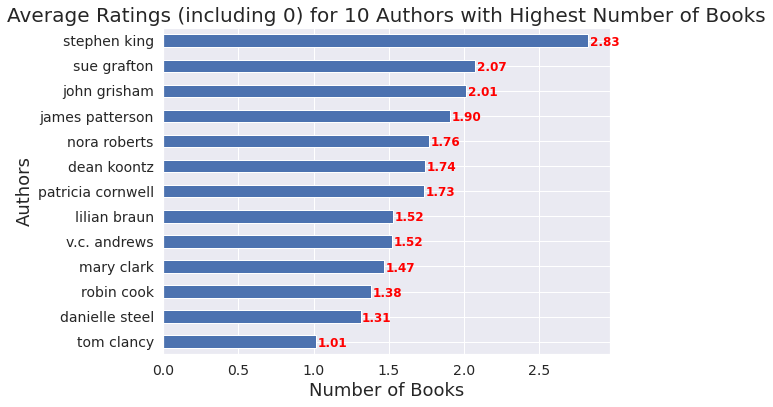

In [724]:
#average rating of the authors who wrote at least 10 books
avg_rating_top = final_rating.loc[final_rating['author'].isin(final_rating[['title', 'author']].drop_duplicates()['author'].value_counts()[:13].keys())].groupby(['author']).mean()['rating'].sort_values()
plt.figure(figsize=(8,6))
avg_rating_top.sort_values().plot(kind='barh')

plt.title("Average Ratings (including 0) for 10 Authors with Highest Number of Books", fontsize=20)
plt.xlabel('Number of Books', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Authors', fontsize=18)
plt.yticks(fontsize=14)

for index, value in enumerate(list(avg_rating_top)):
  plt.text(value+0.01, index-.2, str(value)[:4], color = 'red', fontweight = 'bold')
plt.show()

In [725]:
excluding_zero = final_rating[final_rating['rating']!=0]
excluding_zero

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
12,41084,002542730X,7,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
16,52584,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,james garner,1994,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
334639,242083,0393050939,10,Stiff: The Curious Lives of Human Cadavers,mary roach,2003,W. W. Norton &amp; Company
334643,274308,0393050939,8,Stiff: The Curious Lives of Human Cadavers,mary roach,2003,W. W. Norton &amp; Company
334644,59971,1400100976,8,Stiff: The Curious Lives of Human Cadavers,mary roach,2003,Tantor Media
334646,138441,1400100976,9,Stiff: The Curious Lives of Human Cadavers,mary roach,2003,Tantor Media


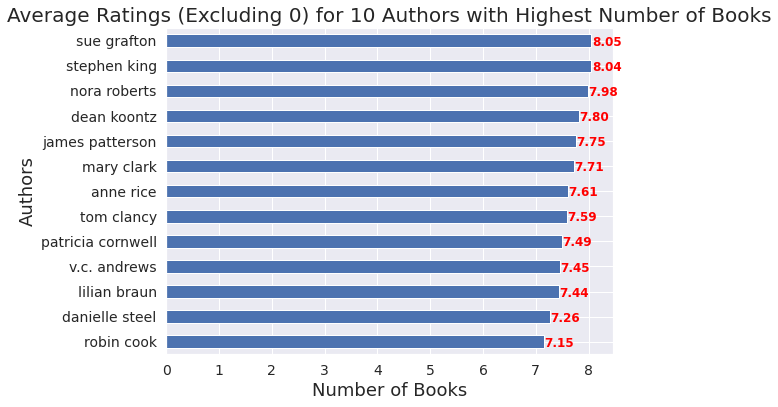

In [726]:
#average rating of the authors who wrote at least 10 books, not considereing 0 as rating
avg_rating_notZERO = excluding_zero.loc[excluding_zero['author'].isin(excluding_zero[['title', 'author']].drop_duplicates()['author'].value_counts()[:13].keys())].groupby(['author']).mean()['rating'].sort_values()
plt.figure(figsize=(8,6))
avg_rating_notZERO.sort_values().plot(kind='barh')

plt.title("Average Ratings (Excluding 0) for 10 Authors with Highest Number of Books", fontsize=20)
plt.xlabel('Number of Books', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Authors', fontsize=18)
plt.yticks(fontsize=14)

for index, value in enumerate(list(avg_rating_notZERO)):
  plt.text(value+0.01, index-.2, str(value)[:4], color = 'red', fontweight = 'bold')
plt.show()

Average Rating graph

In [727]:
meanRating_df = pd.DataFrame(final_rating.groupby(['title']).mean()['rating'].sort_values(ascending = False))

In [728]:
meanRating_df = round(meanRating_df['rating'].sort_index(),1)

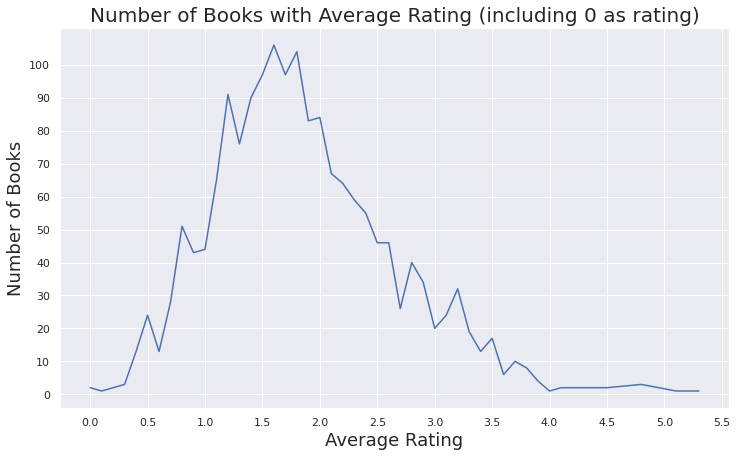

In [729]:
#Graph to represent the number of books with average rating
plt.figure(figsize=[12,7])
plt.plot(meanRating_df.value_counts().sort_index())
plt.title ('Number of Books with Average Rating (including 0 as rating)', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.xticks(np.arange(0,6,0.5))
plt.yticks(np.arange(0,110,10))
plt.show()

In [730]:
meanRating_excludingZERO = pd.DataFrame(excluding_zero.groupby(['title']).mean()['rating'].sort_values(ascending = False))

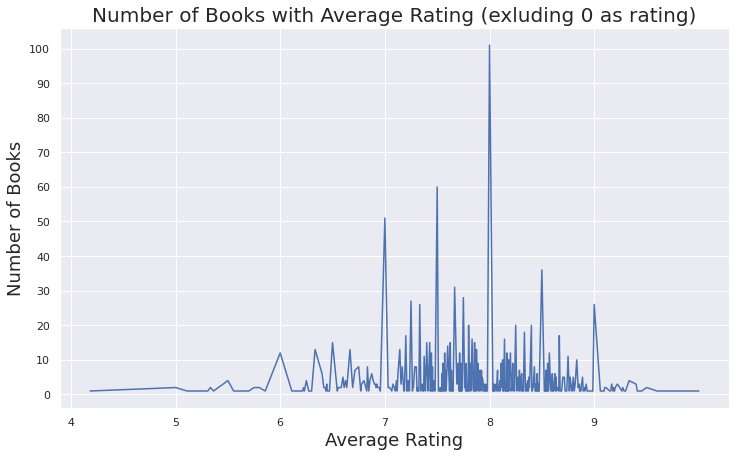

In [731]:
#Graph to represent the number of books with average rating
plt.figure(figsize=[12,7])
plt.plot(meanRating_excludingZERO['rating'].value_counts().sort_index())
plt.title ('Number of Books with Average Rating (exluding 0 as rating)', fontsize = 20)
plt.xlabel('Average Rating', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.xticks(np.arange(4,10,1))
plt.yticks(np.arange(0,110,10))
plt.show()

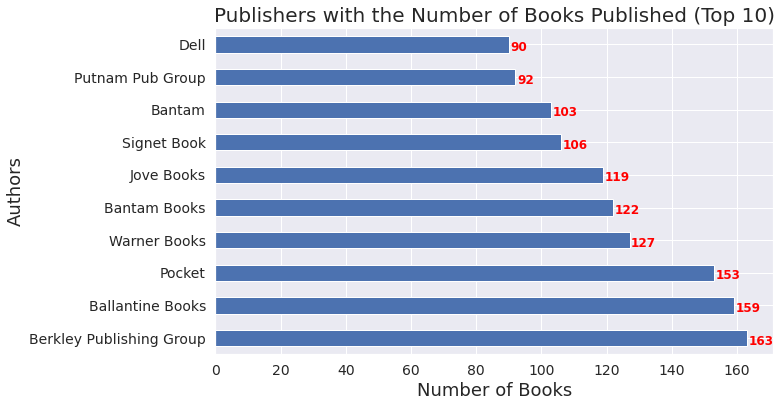

In [732]:
#top 10 publishers in terms of the number of books
plt.figure(figsize=(10,6))
final_rating[['title', 'publisher']].drop_duplicates()['publisher'].value_counts()[:10].plot(kind='barh')
plt.title("Publishers with the Number of Books Published (Top 10)", fontsize=20)
plt.xlabel('Number of Books', fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Authors', fontsize=18)
plt.yticks(fontsize=14)


for index, value in enumerate(list(final_rating[['title', 'publisher']].drop_duplicates()['publisher'].value_counts()[:10].values)):
  plt.text(value+0.5, index-.2, str(value), color = 'red', fontweight = 'bold')
plt.show()

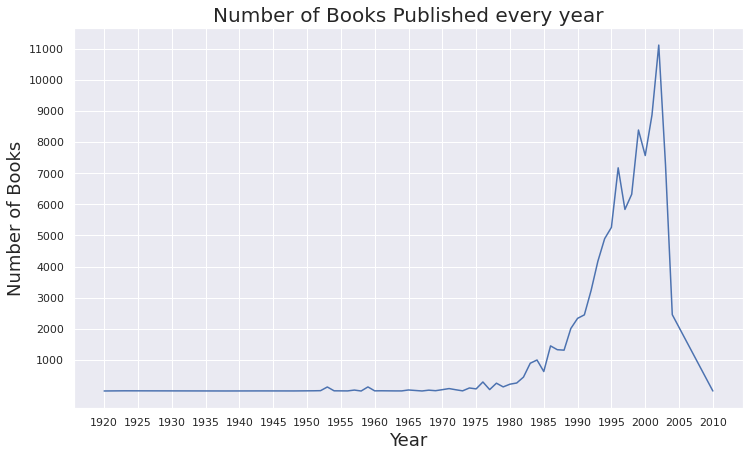

In [733]:
#year wise number of books published
plt.figure(figsize=[12,7])
plt.plot(final_rating['year'].value_counts().sort_index())
plt.title ('Number of Books Published every year', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of Books', fontsize = 18)
plt.xticks(np.arange(1920,2015,5))
plt.yticks(np.arange(1000,12000,1000))
plt.show()

###Keeping only 'user_id' and 'title'(book title) columns for algorithm.

In [734]:
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [735]:
final_rating.shape

(95673, 7)

#Building Recommendation System

In [736]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values='rating')

In [737]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [738]:
book_pivot.fillna(0, inplace=True)

In [739]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [740]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [741]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [742]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [743]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [744]:
np.where(book_pivot.index==237)

(array([], dtype=int64),)

In [745]:
distances, suggestions = model.kneighbors(book_pivot.iloc[356,:].values.reshape(1,-1), n_neighbors=6)

In [746]:
distances

array([[ 0.        , 16.73320053, 16.94107435, 17.74823935, 17.74823935,
        18.35755975]])

In [747]:
len(distances[0])

6

In [748]:
suggestions

array([[ 356,  346,  514,  483,  781, 1554]])

In [749]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Demolition Angel', 'Dead in the Water', 'Get Shorty', 'Fortune's Hand',
       'Monster Blood (Goosebumps, No 3)', 'The Vendetta Defense'],
      dtype='object', name='title')


In [750]:
def book_recommendation(book_name):
  book_id = np.where(book_pivot.index==book_name)[0][0]
  distances, suggestions = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6)
  print("The books similar to",book_pivot.index[suggestions[0][0]], "are:\n", list(book_pivot.index[suggestions[0][1:]]))

In [751]:
book_recommendation('Animal Farm')

The books similar to Animal Farm are:
 ['Women in His Life', 'Unnatural Causes', 'Monster Blood (Goosebumps, No 3)', "Fortune's Hand", 'Poland']


In [752]:
book_recommendation('Harry Potter and the Chamber of Secrets (Book 2)')

The books similar to Harry Potter and the Chamber of Secrets (Book 2) are:
 ['Harry Potter and the Prisoner of Azkaban (Book 3)', 'Harry Potter and the Goblet of Fire (Book 4)', "Harry Potter and the Sorcerer's Stone (Book 1)", "The Mammoth Hunters (Auel, Jean M. , Earth's Children.)", 'Dinner at the Homesick Restaurant']


#Conclusion